In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

In [267]:
df=pd.read_csv('heart.csv')

In [268]:
df.shape

(918, 12)

In [269]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [270]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [271]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [272]:
columns=df.columns

In [273]:
columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [274]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [275]:
for col in columns:
    print(col,df[col].nunique())

Age 50
Sex 2
ChestPainType 4
RestingBP 67
Cholesterol 222
FastingBS 2
RestingECG 3
MaxHR 119
ExerciseAngina 2
Oldpeak 53
ST_Slope 3
HeartDisease 2


In [276]:
for col in columns:
    if df[col].nunique() < 10:
        print(col,df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
FastingBS [0 1]
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']
HeartDisease [0 1]


<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

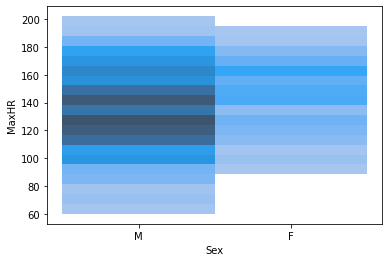

In [277]:
sns.histplot(data=df,x='Sex',y='MaxHR')

d:\User\github\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='MaxHR'>

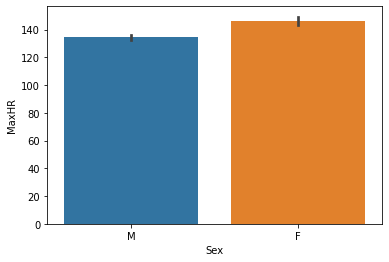

In [278]:
sns.barplot(df['Sex'],df['MaxHR'])

<AxesSubplot:ylabel='Sex'>

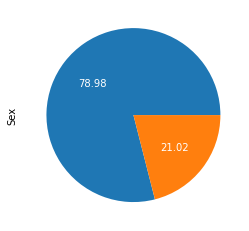

In [279]:
df.Sex.value_counts().plot(kind='pie',autopct='%.2f',textprops={'color':"w"})

<AxesSubplot:>

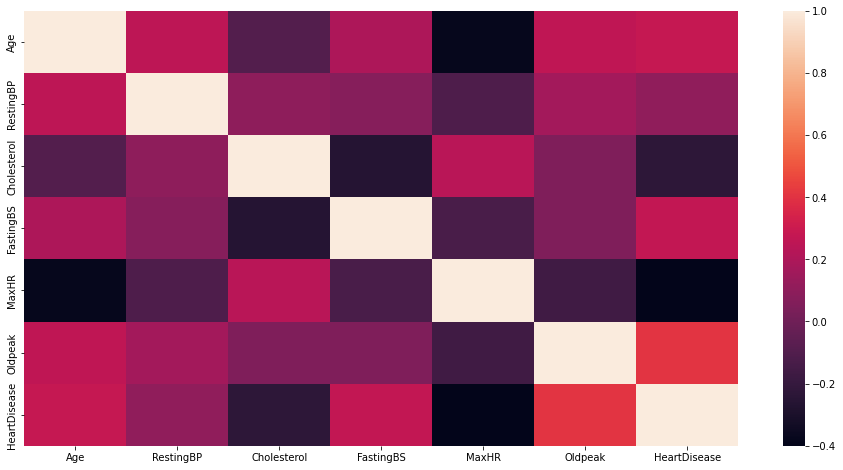

In [280]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr())

In [281]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [282]:
df['Sex']=df['Sex'].astype('category')
df['ChestPainType']=df['ChestPainType'].astype('category')
df['FastingBS']=df['FastingBS'].astype('category')
df['RestingECG']=df['RestingECG'].astype('category')
df['ExerciseAngina']=df['ExerciseAngina'].astype('category')
df['ST_Slope']=df['ST_Slope'].astype('category')

In [283]:
df.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP            int64
Cholesterol          int64
FastingBS         category
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

In [284]:
for i in columns:
    if df[i].dtype == 'category':
        df[i+'_new']=df[i].cat.codes


In [285]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_new,ChestPainType_new,FastingBS_new,RestingECG_new,ExerciseAngina_new,ST_Slope_new
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,0,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,0,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,0,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,0,1,0,2


In [286]:
df.drop(['Sex','ChestPainType','RestingECG','FastingBS','ExerciseAngina','ST_Slope'],axis=1,inplace=True)

In [287]:
from sklearn.preprocessing import OneHotEncoder

In [288]:
ohe=OneHotEncoder()

In [289]:
df.rename({'Sex_new':'Sex','ChestPainType_new':'ChestPainType','FastingBS_new':'FastingBS','RestingECG_new':'RestingECG','ExerciseAngina_new':'ExerciseAngina','ST_Slope_new':'ST_Slope'},inplace=True,axis=1)

In [290]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,172,0.0,0,1,1,0,1,0,2
1,49,160,180,156,1.0,1,0,2,0,1,0,1
2,37,130,283,98,0.0,0,1,1,0,2,0,2
3,48,138,214,108,1.5,1,0,0,0,1,1,1
4,54,150,195,122,0.0,0,1,2,0,1,0,2


In [291]:
for col in columns:
    if df[col].nunique() < 10:
        print(col,df[col].unique())

Sex [1 0]
ChestPainType [1 2 0 3]
FastingBS [0 1]
RestingECG [1 2 0]
ExerciseAngina [0 1]
ST_Slope [2 1 0]
HeartDisease [0 1]


In [292]:
ohe_data = pd.get_dummies(df, columns = ['ChestPainType','RestingECG','ST_Slope'])


In [293]:
data=ohe_data

In [294]:
pd.set_option('display.max_columns', None)

In [295]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex,FastingBS,ExerciseAngina,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,140,289,172,0.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1


In [296]:
data.tail()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex,FastingBS,ExerciseAngina,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
913,45,110,264,132,1.2,1,1,0,0,0,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,1,1,0,1,0,0,0,0,1,0,0,1,0
915,57,130,131,115,1.2,1,1,0,1,1,0,0,0,0,1,0,0,1,0
916,57,130,236,174,0.0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
917,38,138,175,173,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1


In [297]:
data.drop(['ChestPainType_3','RestingECG_2','ST_Slope_2'],inplace=True,axis=1)

In [298]:
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex,FastingBS,ExerciseAngina,ChestPainType_0,ChestPainType_1,ChestPainType_2,RestingECG_0,RestingECG_1,ST_Slope_0,ST_Slope_1
0,40,140,289,172,0.0,0,1,0,0,0,1,0,0,1,0,0
1,49,160,180,156,1.0,1,0,0,0,0,0,1,0,1,0,1
2,37,130,283,98,0.0,0,1,0,0,0,1,0,0,0,0,0
3,48,138,214,108,1.5,1,0,0,1,1,0,0,0,1,0,1
4,54,150,195,122,0.0,0,1,0,0,0,0,1,0,1,0,0


In [299]:
x=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

In [300]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [301]:
from sklearn.model_selection import train_test_split

In [302]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=40)

In [303]:
xtrain=st.fit_transform(xtrain)
xtest=st.transform(xtest)

In [304]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
rc=RandomForestClassifier(n_estimators=100)
skf=StratifiedKFold(n_splits=30)

In [305]:
crv=cross_validate(estimator=rc,X=xtrain,y=ytrain,cv=skf)

In [306]:
print('Accuracy Scre:%.2f'%(crv['test_score'].mean()*100))

Accuracy Scre:87.49


In [307]:
rc.fit(xtrain,ytrain)

RandomForestClassifier()

In [308]:
feature_importance={}
col=x.columns
c=0
for i in rc.feature_importances_:
    feature_importance[col[c]]=i
    c+=1

In [309]:
feature_importance

{'Age': 0.08246605386246922,
 'RestingBP': 0.07500330952528511,
 'Cholesterol': 0.10800726763043592,
 'MaxHR': 0.12429014061887014,
 'Oldpeak': 0.10663263989218043,
 'Sex': 0.03657496044611576,
 'FastingBS': 0.03248202240893848,
 'ExerciseAngina': 0.09670369690742255,
 'ChestPainType_0': 0.09562991016129843,
 'ChestPainType_1': 0.028368193456674982,
 'ChestPainType_2': 0.01700968781494674,
 'RestingECG_0': 0.018369284392918683,
 'RestingECG_1': 0.016326532833419442,
 'ST_Slope_0': 0.009919798611213832,
 'ST_Slope_1': 0.15221650143781007}

In [310]:
feature_imp=pd.Series(data=np.multiply(rc.feature_importances_,100),index=col)

In [311]:
feature_imp.sum()

99.99999999999997

In [312]:
feature_imp.sort_values(ascending=False)

ST_Slope_1         15.221650
MaxHR              12.429014
Cholesterol        10.800727
Oldpeak            10.663264
ExerciseAngina      9.670370
ChestPainType_0     9.562991
Age                 8.246605
RestingBP           7.500331
Sex                 3.657496
FastingBS           3.248202
ChestPainType_1     2.836819
RestingECG_0        1.836928
ChestPainType_2     1.700969
RestingECG_1        1.632653
ST_Slope_0          0.991980
dtype: float64

here this series is showing the importance from higher to lower

In [313]:
from sklearn.metrics import classification_report

In [314]:
y_train_pred=rc.predict(xtrain)

In [315]:
print(classification_report(ytrain,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       399

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



In [316]:
ypred=rc.predict(xtest)

In [317]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        75
           1       0.88      0.89      0.89       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

